In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

Flask version

In [58]:
import flask
print (flask.__version__)

1.1.2


TensorFlow version and GPU

In [3]:
#check TensorFlow version and GPU availability
print('tensorflow version : ',tf.__version__)
print('GPU : ', tf.config.list_physical_devices('GPU'))

tensorflow version :  2.11.0
GPU :  []


Read Img

In [4]:
N_Color = 3
IMG_DIMEN = 224

In [5]:
def read_image(img_path):
    img= cv2.imread(img_path)
    img= cv2.resize(img, (IMG_DIMEN, IMG_DIMEN))
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')/255.0
    return img

Showing Img

In [6]:
def imshow(img):
    plt.figure(figsize=(6, 6))
    if N_Color == 3:
        plt.imshow(img)
    elif N_Color == 1:
        plt.imshow(img, cmap='gray')
    plt.show()

In [7]:
#img = read_image(r'"D:/3rd year Second Term/Neural networks/datasets/melanoma_cancer_dataset/train/benign/melanoma_0.jpg/"')
#imshow(img)

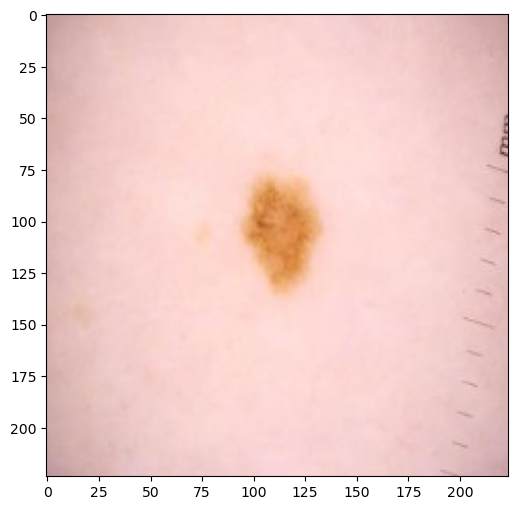

In [8]:
def read_image(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, dsize=(IMG_DIMEN, IMG_DIMEN))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype('float32')/255.0
        return img
    else:
        print(f"Failed to read image file: {img_path}")
        return None

img = read_image("D:/3rd year Second Term/Neural networks/datasets/melanoma_cancer_dataset/train/benign/melanoma_0.jpg")
if img is not None:
    imshow(img)

Load saved Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow. keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.layers import Dense, Activation
from keras import Sequential
from keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [10]:
size = 224
model = keras.models.Sequential([
        keras.layers.Conv2D(32, 3, activation='relu',input_shape=(size,size,3)),
        keras.layers.Dropout(0.1) ,
        keras.layers.MaxPooling2D(), 
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.Dropout(0.15) ,
        keras.layers.MaxPooling2D(), 
        keras.layers.Flatten() ,               
        keras.layers.Dense(128,activation='relu') ,    
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(2,activation='softmax') ,    
        ])

In [26]:
model = load_model("EfficientNetB2_2.h5")
#model = load_model("ResNet50.h5")

Classify img function

In [27]:
def classify_image (img_path):
    img = read_image (img_path)
    return float(model.predict(np.array([img])). squeeze()) #probability >0.5 mel <0.5 begnin

classify_image("D:/3rd year Second Term/Neural networks/datasets/melanoma_cancer_dataset/train/malignant/melanoma_5047.jpg")

1/1 [==============================] - 1s 878ms/step


0.5014813542366028

In [28]:
#import numpy as np

#def classify_image(img_path):
#    img = read_image(img_path)
#    prob = model.predict(np.array([img])).squeeze()
#    return float(prob)

In [29]:
#import numpy as np

#def classify_image(img_path):
#    img = read_image(img_path)
#    prob = model.predict(np.array([img])).squeeze()
#    predicted_class = np.argmax(prob)
#    return predicted_class

In [30]:
from flask import Flask
from flask import request

app = Flask (__name__) #object from flask
#run alltime server active
#handle requests to api from php server
@app.route('/classify', methods=['POST']) 
#if someone post req in this url (localhost/classify) http://localhost:9000/classify          
def classify_handler():
    img_path = request.form['path']
    y_pred = classify_image (img_path)
    class_name = 'malignant' if y_pred >= 0.5 else 'benign'
    prob_malignant = y_pred
    prob_benign = 1 - y_pred
    print('img_path: ', img_path)
    print('y_pred: ', y_pred)
    print('class_name:', class_name)
    return { #returm json (dictionary)
        'prob_benign': prob_benign,
        'prob_malignant': prob_malignant,
        'class_name': class_name}
           
app.run(port=9000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)


1/1 [==============================] - 0s 173ms/step


127.0.0.1 - - [17/May/2023 09:27:50] "POST /classify HTTP/1.1" 200 -


img_path:  C:/xampp/htdocs/neural/skin_imgs/16843048681583255638646473e43f839.jpg
y_pred:  0.5014793276786804
class_name: malignant
